In [1]:

import numpy as np

def get_piano_notes():   
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 440 #Frequency of Note A4
    keys = np.array([x+str(y) for y in range(0,9) for x in octave])
    # Trim to standard 88 keys
    start = np.where(keys == 'A0')[0][0]
    end = np.where(keys == 'C8')[0][0]
    keys = keys[start:end+1]
    
    note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
    note_freqs[''] = 0.0 # stop
    return note_freqs

In [2]:
import numpy as np

def get_sine_wave(frequency, duration, sample_rate=44100, amplitude=4096):
    t = np.linspace(0, duration, int(sample_rate*duration)) # Time axis
    wave = amplitude*np.sin(2*np.pi*frequency*t)
    return wave

In [3]:

import numpy as np
from scipy.io import wavfile

# Get middle C frequency
note_freqs = get_piano_notes()
frequency = note_freqs['C4']

# Pure sine wave
sine_wave = get_sine_wave(frequency, duration=2, amplitude=2048)
wavfile.write('pure_c.wav', rate=44100, data=sine_wave.astype(np.int16))

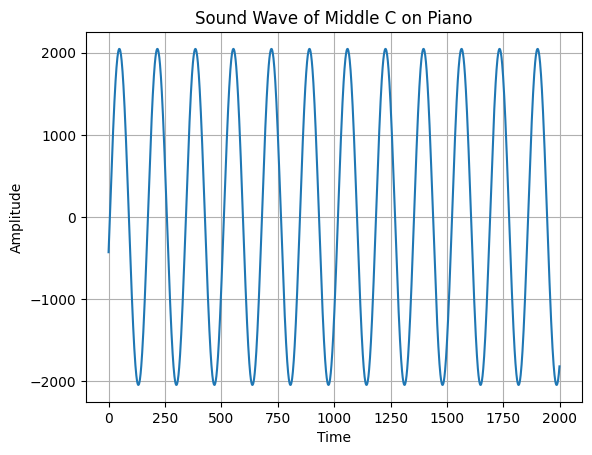

In [6]:

from scipy.io import wavfile
import matplotlib.pyplot as plt


# Load data from wav file
sample_rate, middle_c = wavfile.read('pure_c.wav')

# Plot sound wave
plt.plot(middle_c[500:2500])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of Middle C on Piano')
plt.grid()

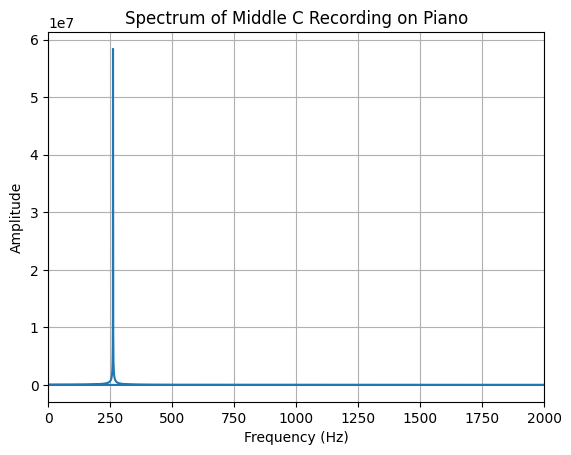

In [12]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
#plt.style.use('seaborn-dark')

# Load data from wav file
sample_rate, middle_c = wavfile.read('pure_c.wav')

#FFT
t = np.arange(middle_c.shape[0])
freq = np.fft.fftfreq(t.shape[-1])*sample_rate
sp = np.fft.fft(middle_c) 

# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Middle C Recording on Piano')
plt.xlim((0, 2000))
plt.grid()